In [ ]:
# original code: https://github.com/lazyprogrammer/machine_learning_examples

# 1. bigram efficient code

In [1]:
# Course URL:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

import os
import sys
sys.path.append(os.path.abspath('..'))
from rnn_class.util import get_wikipedia_data
from rnn_class.brown import get_sentences_with_word2idx_limit_vocab, get_sentences_with_word2idx

from markov import get_bigram_probs

# 1.1 make input data

In [2]:
sentences, word2idx = get_sentences_with_word2idx_limit_vocab(2000)
# sentences, word2idx = get_sentences_with_word2idx()

# vocab size
V = len(word2idx)
print("Vocab size:", V)

# we will also treat beginning of sentence and end of sentence as bigrams
# START -> first word
# last word -> END
start_idx = word2idx['START']
end_idx = word2idx['END']

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

pass 89
goes 89
names 89
quickly 89
regard 89
published 89
famous 89
develop 89
clothes 89
laws 88
announced 88
carry 88
cover 88
moreover 88
add 88
greatest 88
check 88
enemy 88
leaving 88
key 88
manager 88
doesn't 88
active 88
break 88
bottom 88
pain 88
relationship 88
sources 88
poetry 88
assistance 87
operating 87
battle 87
companies 87
fixed 87
possibility 87
mary 87
product 87
spoke 87
units 87
touch 87
bright 87
finished 87
carefully 87
facts 87
previous 86
citizens 86
takes 86
e. 86
allowed 86
require 86
workers 86
build 86
patient 86
financial 86
philosophy 86
loss 86
rose 86
died 86
scientific 86
otherwise 86
inches 86
significant 86
seeing 86
distribution 85
marked 85
post 85
rules 85
capital 85
captain 85
relatively 85
classes 85
variety 85
stated 85
shape 85
stations 85
german 85
musical 85
concept 85
reports 84
proposed 84
w. 84
begin 84
impossible 84
affairs 84
named 84
circumstances 84
learn 84
remains 84
appears 84
strange 84
catholic 84
operations 84
collection 84
awa

Vocab size: 2001


In [3]:
print(sentences[0])

[13, 2000, 661, 2000, 1639, 74, 1850, 47, 2000, 16, 2000, 561, 1129, 1408, 1202, 26, 71, 483, 27, 21, 97, 2000, 224, 182, 15]


# 1.2 bigram prob

In [6]:
smoothing = 0.7
bigram_prob = np.ones((V, V)) * smoothing #co-occurrence라고 생각하면 됨
for sen in sentences: # sen은 word2idx에 의해 mapping되어있음
    for i in range(len(sen)):
        if i == 0:
            bigram_prob[start_idx, sen[i]] += 1 # p(sen[i] | start_idx)
        else:
            bigram_prob[sen[i-1], sen[i]] # p(sen[i-1] | sen[i])
    bigram_prob[sen[-1], end_idx] += 1 # p(end_idx | sen[-1])
bigram_prob /= bigram_prob.sum(axis=1, keepdims=True) # row wise sum. 각 단어들 다음에 row의 단어가 나올 확률.

In [7]:
def get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=1):
    # structure of bigram probability matrix will be:
    # (last word, current word) --> probability
    # we will use add-1 smoothing
    # note: we'll always ignore this from the END token
    bigram_probs = np.ones((V, V)) * smoothing
    for sentence in sentences:
        for i in range(len(sentence)):

            if i == 0:
                # beginning word
                bigram_probs[start_idx, sentence[i]] += 1
            else:
                # middle word
                bigram_probs[sentence[i-1], sentence[i]] += 1

            # if we're at the final word
            # we update the bigram for last -> current
            # AND current -> END token
            if i == len(sentence) - 1:
                # final word
                bigram_probs[sentence[i], end_idx] += 1

    # normalize the counts along the rows to get probabilities
    bigram_probs /= bigram_probs.sum(axis=1, keepdims=True)
    return bigram_probs

# 1.3 calculate score

In [8]:
def get_score():
    score = 0
    num_sen = len(sen)
    for i in range(num_sen):
        if i == 0:
            score += np.log(bigram_prob[start_idx, sen[i]]) # bigram_prob: 벡터
        else:
            score += np.log(bigram_prob[sen[i-1], sen[i]])
    score += np.log(bigram_prob[sen[-1], end_idx])
    score /= (len(num_sen)+1) # normalize the score: 
                              # +1은 vocab size가 원래 vocab + pad <s>, </s> 되기 떄문.

# 2. Neural Net Bigram

In [10]:
bigram_probs = get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=0.1)
bigram_probs.shape

(2001, 2001)

# 2.1 make input data

In [19]:
sentence = sentences[0]
sentence = [start_idx] + sentence + [end_idx]
print(sentence)

[0, 13, 2000, 661, 2000, 1639, 74, 1850, 47, 2000, 16, 2000, 561, 1129, 1408, 1202, 26, 71, 483, 27, 21, 97, 2000, 224, 182, 15, 1]


In [33]:
# sentence[n]: n번쨰 word의 word_idx
n = len(sentence)
inputs = np.zeros((n-1, V))
inputs[np.arange(n-1), sentence[:n-1]] = 1 
targets = np.zeros((n-1, V))
targets[np.arange(n-1), sentence[1:]] = 1

# 2.2 make W

In [13]:
def softmax(a):
    a = a - a.max()
    exp_a = np.exp(a)
    return exp_a / exp_a.sum(axis=1, keepdims=True)

bigram_losses = []
w_bigram = np.log(bigram_probs) # p(row|col)의 log prob
print(w_bigram.shape)

(2001, 2001)


In [36]:
W = np.random.randn(V, V) / np.sqrt(V) 
losses = []
epochs = 1
lr = 1e-1

# 2.3 prediction

In [38]:
# input: <s>, 1st word, ..., last word
# predictions: input 다음에 올 단어(n_vocab: 2001)가 발생할 각각 prob 
predictions = softmax(inputs.dot(W))
# 아래 경우는 prediction이 곧 bigram_probs
# 즉 통계적 bigra model에서 bigram_probs는 일종의 weight
# predictions = softmax(inputs.dot(w_bigram))
predictions.shape 

(26, 2001)

# 2.4 update Weight

In [47]:
loss = np.sum(targets * (-np.log(predictions))) / (n-1)
W = W - lr * inputs.T.dot(predictions - targets)
losses.append(loss)

# 3. for loop

In [ ]:
for epoch in range(epochs):
    # shuffle sentences at each epoch
    random.shuffle(sentences)
    for j, sentence in enumerate(sentences):
        sentence = [start_idx] + sentence + [end_idx]
        n = len(sentence)
        inputs = np.zeros((n - 1, V))
        targets = np.zeros((n - 1, V))
        inputs[np.arange(n - 1), sentence[:n-1]] = 1
        targets[np.arange(n - 1), sentence[1:]] = 1

        predictions = softmax(inputs.dot(W))
        loss = -np.sum(targets * np.log(predictions)) / (n - 1)
        losses.append(loss)
        
        W = W - lr * inputs.T.dot(predictions - targets)
        if epoch == 0:
            bigram_predictions = softmax(inputs.dot(w_bigram))
            bigram_loss = -np.sum(targets * np.log(bigram_predictions)) / (n - 1)
            bigram_losses.append(bigram_loss)

        if j % 10 == 0:
            print("epoch:", epoch, "sentence: %s/%s" % \
                  (j, len(sentences)), "loss:", loss)
        j += 1

epoch: 0 sentence: 0/57013 loss: 6.205426429821341
epoch: 0 sentence: 10/57013 loss: 5.634963940141091
epoch: 0 sentence: 20/57013 loss: 6.303031705738093
epoch: 0 sentence: 30/57013 loss: 5.050868583680038
epoch: 0 sentence: 40/57013 loss: 5.093830757008298
epoch: 0 sentence: 50/57013 loss: 6.28316646751206
epoch: 0 sentence: 60/57013 loss: 5.861134215924865
epoch: 0 sentence: 70/57013 loss: 6.1486699081554494
epoch: 0 sentence: 80/57013 loss: 5.862525498132357
epoch: 0 sentence: 90/57013 loss: 4.552261320769167
epoch: 0 sentence: 100/57013 loss: 6.493003549377263
epoch: 0 sentence: 110/57013 loss: 3.765860366330153
epoch: 0 sentence: 120/57013 loss: 5.498794256906747
epoch: 0 sentence: 130/57013 loss: 5.432841461883396
epoch: 0 sentence: 140/57013 loss: 6.125049899222195
epoch: 0 sentence: 150/57013 loss: 6.252281054740916
epoch: 0 sentence: 160/57013 loss: 4.829435869117167
epoch: 0 sentence: 170/57013 loss: 6.113226605223295
epoch: 0 sentence: 180/57013 loss: 7.063065252192958
epoc

epoch: 0 sentence: 1540/57013 loss: 4.997461169529235
epoch: 0 sentence: 1550/57013 loss: 6.461056695097717
epoch: 0 sentence: 1560/57013 loss: 6.190809980387548
epoch: 0 sentence: 1570/57013 loss: 5.538358465986825
epoch: 0 sentence: 1580/57013 loss: 6.199252328904181
epoch: 0 sentence: 1590/57013 loss: 4.047359949479776
epoch: 0 sentence: 1600/57013 loss: 6.968625726629374
epoch: 0 sentence: 1610/57013 loss: 5.681151438678899
epoch: 0 sentence: 1620/57013 loss: 5.292743122782689
epoch: 0 sentence: 1630/57013 loss: 6.476213271889807
epoch: 0 sentence: 1640/57013 loss: 6.680997818242932
epoch: 0 sentence: 1650/57013 loss: 6.355962277917453
epoch: 0 sentence: 1660/57013 loss: 4.621012280215426
epoch: 0 sentence: 1670/57013 loss: 4.560031532654455
epoch: 0 sentence: 1680/57013 loss: 5.956907076277101
epoch: 0 sentence: 1690/57013 loss: 4.528120019365554
epoch: 0 sentence: 1700/57013 loss: 4.359063080170206
epoch: 0 sentence: 1710/57013 loss: 4.102911346345481
epoch: 0 sentence: 1720/5701

epoch: 0 sentence: 3060/57013 loss: 5.519434854403216
epoch: 0 sentence: 3070/57013 loss: 5.227215008384231
epoch: 0 sentence: 3080/57013 loss: 6.518170731943339
epoch: 0 sentence: 3090/57013 loss: 5.8590267242597
epoch: 0 sentence: 3100/57013 loss: 5.646230600907207
epoch: 0 sentence: 3110/57013 loss: 6.639949140391195
epoch: 0 sentence: 3120/57013 loss: 3.8922968418472617
epoch: 0 sentence: 3130/57013 loss: 3.962470449587617
epoch: 0 sentence: 3140/57013 loss: 6.179841776811136
epoch: 0 sentence: 3150/57013 loss: 5.9382926581248405
epoch: 0 sentence: 3160/57013 loss: 5.3911984272887965
epoch: 0 sentence: 3170/57013 loss: 4.462607931523312
epoch: 0 sentence: 3180/57013 loss: 5.794022794412319
epoch: 0 sentence: 3190/57013 loss: 5.941150109125581
epoch: 0 sentence: 3200/57013 loss: 5.472358931479725
epoch: 0 sentence: 3210/57013 loss: 5.420655038636496
epoch: 0 sentence: 3220/57013 loss: 4.629384112082204
epoch: 0 sentence: 3230/57013 loss: 5.760897887712871
epoch: 0 sentence: 3240/570

epoch: 0 sentence: 4580/57013 loss: 5.166824296719895
epoch: 0 sentence: 4590/57013 loss: 4.486468103481266
epoch: 0 sentence: 4600/57013 loss: 3.5512337394586395
epoch: 0 sentence: 4610/57013 loss: 5.353374676580045
epoch: 0 sentence: 4620/57013 loss: 4.432918658562905
epoch: 0 sentence: 4630/57013 loss: 5.344517916256598
epoch: 0 sentence: 4640/57013 loss: 5.345369826980306
epoch: 0 sentence: 4650/57013 loss: 4.440889948546522
epoch: 0 sentence: 4660/57013 loss: 4.649066524359863
epoch: 0 sentence: 4670/57013 loss: 4.679785951004326
epoch: 0 sentence: 4680/57013 loss: 6.254846936407531
epoch: 0 sentence: 4690/57013 loss: 6.153696728608177
epoch: 0 sentence: 4700/57013 loss: 4.597206174241591
epoch: 0 sentence: 4710/57013 loss: 1.8586871515645924
epoch: 0 sentence: 4720/57013 loss: 4.665713106543858
epoch: 0 sentence: 4730/57013 loss: 4.980088709168147
epoch: 0 sentence: 4740/57013 loss: 5.932864171107272
epoch: 0 sentence: 4750/57013 loss: 3.902571021171448
epoch: 0 sentence: 4760/57

epoch: 0 sentence: 6100/57013 loss: 5.508858255372987
epoch: 0 sentence: 6110/57013 loss: 4.3731232053316855
epoch: 0 sentence: 6120/57013 loss: 3.2176549588295154
epoch: 0 sentence: 6130/57013 loss: 5.737169566346244
epoch: 0 sentence: 6140/57013 loss: 5.374104708950162
epoch: 0 sentence: 6150/57013 loss: 5.5507381837288925
epoch: 0 sentence: 6160/57013 loss: 4.918216423459824
epoch: 0 sentence: 6170/57013 loss: 4.6406583604320515
epoch: 0 sentence: 6180/57013 loss: 5.9503756416336255
epoch: 0 sentence: 6190/57013 loss: 6.174553489393718
epoch: 0 sentence: 6200/57013 loss: 4.872519547370016
epoch: 0 sentence: 6210/57013 loss: 5.29267604100965
epoch: 0 sentence: 6220/57013 loss: 6.903576470419657
epoch: 0 sentence: 6230/57013 loss: 5.355104886746905
epoch: 0 sentence: 6240/57013 loss: 3.839318393374086
epoch: 0 sentence: 6250/57013 loss: 1.586759771334998
epoch: 0 sentence: 6260/57013 loss: 5.623430218578726
epoch: 0 sentence: 6270/57013 loss: 4.540832390782433
epoch: 0 sentence: 6280/

epoch: 0 sentence: 7620/57013 loss: 3.9019636798181483
epoch: 0 sentence: 7630/57013 loss: 5.965981077308569
epoch: 0 sentence: 7640/57013 loss: 3.7600015015579635
epoch: 0 sentence: 7650/57013 loss: 5.633228800056461
epoch: 0 sentence: 7660/57013 loss: 5.6152928590849855
epoch: 0 sentence: 7670/57013 loss: 5.32690325793701
epoch: 0 sentence: 7680/57013 loss: 4.449038209280943
epoch: 0 sentence: 7690/57013 loss: 4.4822315752166215
epoch: 0 sentence: 7700/57013 loss: 5.39997390241559
epoch: 0 sentence: 7710/57013 loss: 5.2471548030435615
epoch: 0 sentence: 7720/57013 loss: 5.041113836501364
epoch: 0 sentence: 7730/57013 loss: 5.082590578152305
epoch: 0 sentence: 7740/57013 loss: 6.304280124333482
epoch: 0 sentence: 7750/57013 loss: 5.588207759422165
epoch: 0 sentence: 7760/57013 loss: 5.9338874077688395
epoch: 0 sentence: 7770/57013 loss: 5.266302024865001
epoch: 0 sentence: 7780/57013 loss: 4.584798769608682
epoch: 0 sentence: 7790/57013 loss: 5.222984661513143
epoch: 0 sentence: 7800/

epoch: 0 sentence: 9140/57013 loss: 4.943019805471477
epoch: 0 sentence: 9150/57013 loss: 4.707732088051576
epoch: 0 sentence: 9160/57013 loss: 4.352797169187183
epoch: 0 sentence: 9170/57013 loss: 4.082901678386622
epoch: 0 sentence: 9180/57013 loss: 4.639022252457856
epoch: 0 sentence: 9190/57013 loss: 4.208126860733623
epoch: 0 sentence: 9200/57013 loss: 5.319361799957655
epoch: 0 sentence: 9210/57013 loss: 5.805319280819713
epoch: 0 sentence: 9220/57013 loss: 5.232629345469479
epoch: 0 sentence: 9230/57013 loss: 4.700640368190234
epoch: 0 sentence: 9240/57013 loss: 6.03713018208559
epoch: 0 sentence: 9250/57013 loss: 4.933932119674798
epoch: 0 sentence: 9260/57013 loss: 5.265144092914352
epoch: 0 sentence: 9270/57013 loss: 5.335274524569473
epoch: 0 sentence: 9280/57013 loss: 5.712014457554461
epoch: 0 sentence: 9290/57013 loss: 5.1684548969298465
epoch: 0 sentence: 9300/57013 loss: 5.553541578457938
epoch: 0 sentence: 9310/57013 loss: 5.1593555616756825
epoch: 0 sentence: 9320/570

epoch: 0 sentence: 10650/57013 loss: 6.002354745664829
epoch: 0 sentence: 10660/57013 loss: 3.5232577811775165
epoch: 0 sentence: 10670/57013 loss: 4.9994917320021255
epoch: 0 sentence: 10680/57013 loss: 4.567513370599013
epoch: 0 sentence: 10690/57013 loss: 5.517762239639925
epoch: 0 sentence: 10700/57013 loss: 5.071788991738456
epoch: 0 sentence: 10710/57013 loss: 4.635795540757875
epoch: 0 sentence: 10720/57013 loss: 4.426132285771902
epoch: 0 sentence: 10730/57013 loss: 5.042555891327659
epoch: 0 sentence: 10740/57013 loss: 5.305326437673963
epoch: 0 sentence: 10750/57013 loss: 5.726418505035268
epoch: 0 sentence: 10760/57013 loss: 4.616584651436173
epoch: 0 sentence: 10770/57013 loss: 5.191065018410363
epoch: 0 sentence: 10780/57013 loss: 5.093077561574554
epoch: 0 sentence: 10790/57013 loss: 3.6272624319591107
epoch: 0 sentence: 10800/57013 loss: 5.560571207226101
epoch: 0 sentence: 10810/57013 loss: 2.630087996875755
epoch: 0 sentence: 10820/57013 loss: 5.887499113953841
epoch: 

epoch: 0 sentence: 12140/57013 loss: 3.5371825129958796
epoch: 0 sentence: 12150/57013 loss: 5.231370398478191
epoch: 0 sentence: 12160/57013 loss: 3.8323431127157375
epoch: 0 sentence: 12170/57013 loss: 5.784952513142554
epoch: 0 sentence: 12180/57013 loss: 4.455374708807347
epoch: 0 sentence: 12190/57013 loss: 5.204604999628737
epoch: 0 sentence: 12200/57013 loss: 4.912186162174596
epoch: 0 sentence: 12210/57013 loss: 3.8137502662212137
epoch: 0 sentence: 12220/57013 loss: 3.756542807052553
epoch: 0 sentence: 12230/57013 loss: 5.618078841387549
epoch: 0 sentence: 12240/57013 loss: 5.351542425524882
epoch: 0 sentence: 12250/57013 loss: 3.6613627364744707
epoch: 0 sentence: 12260/57013 loss: 6.332312183851007
epoch: 0 sentence: 12270/57013 loss: 5.22923029347483
epoch: 0 sentence: 12280/57013 loss: 3.9803954979725993
epoch: 0 sentence: 12290/57013 loss: 6.595637401845833
epoch: 0 sentence: 12300/57013 loss: 4.741175152175651
epoch: 0 sentence: 12310/57013 loss: 3.90248733542144
epoch: 

epoch: 0 sentence: 13630/57013 loss: 5.694896264789119
epoch: 0 sentence: 13640/57013 loss: 4.402246228532181
epoch: 0 sentence: 13650/57013 loss: 5.768211181267566
epoch: 0 sentence: 13660/57013 loss: 4.512809226351923
epoch: 0 sentence: 13670/57013 loss: 5.75137002577587
epoch: 0 sentence: 13680/57013 loss: 3.6180351550862713
epoch: 0 sentence: 13690/57013 loss: 3.444129392024415
epoch: 0 sentence: 13700/57013 loss: 8.072637081056891
epoch: 0 sentence: 13710/57013 loss: 5.824907308051679
epoch: 0 sentence: 13720/57013 loss: 5.35826855541394
epoch: 0 sentence: 13730/57013 loss: 5.608655157448952
epoch: 0 sentence: 13740/57013 loss: 4.920681560660675
epoch: 0 sentence: 13750/57013 loss: 4.862045941712299
epoch: 0 sentence: 13760/57013 loss: 3.958202248775909
epoch: 0 sentence: 13770/57013 loss: 2.9135996823107466
epoch: 0 sentence: 13780/57013 loss: 5.486052515397071
epoch: 0 sentence: 13790/57013 loss: 4.857675924890601
epoch: 0 sentence: 13800/57013 loss: 3.9731227244445204
epoch: 0 

epoch: 0 sentence: 15120/57013 loss: 4.980101748730546
epoch: 0 sentence: 15130/57013 loss: 3.3574362434515894
epoch: 0 sentence: 15140/57013 loss: 5.259618408041906
epoch: 0 sentence: 15150/57013 loss: 4.9645883376169015
epoch: 0 sentence: 15160/57013 loss: 4.733582165797118
epoch: 0 sentence: 15170/57013 loss: 2.405059247949707
epoch: 0 sentence: 15180/57013 loss: 5.315396454157237
epoch: 0 sentence: 15190/57013 loss: 5.178014585460842
epoch: 0 sentence: 15200/57013 loss: 3.209530540060685
epoch: 0 sentence: 15210/57013 loss: 5.932500791485548
epoch: 0 sentence: 15220/57013 loss: 4.748141256690331
epoch: 0 sentence: 15230/57013 loss: 5.302672706570012
epoch: 0 sentence: 15240/57013 loss: 4.411428135047795
epoch: 0 sentence: 15250/57013 loss: 3.8185216629508862
epoch: 0 sentence: 15260/57013 loss: 5.074046069705047
epoch: 0 sentence: 15270/57013 loss: 4.852737547019317
epoch: 0 sentence: 15280/57013 loss: 4.777823534288976
epoch: 0 sentence: 15290/57013 loss: 4.656875951380991
epoch: 

epoch: 0 sentence: 16610/57013 loss: 4.512758125691745
epoch: 0 sentence: 16620/57013 loss: 4.559104270604004
epoch: 0 sentence: 16630/57013 loss: 4.689619635349974
epoch: 0 sentence: 16640/57013 loss: 3.901760970614924
epoch: 0 sentence: 16650/57013 loss: 5.19273863439891
epoch: 0 sentence: 16660/57013 loss: 5.584564099592979
epoch: 0 sentence: 16670/57013 loss: 4.9199243357412445
epoch: 0 sentence: 16680/57013 loss: 5.9153326760821825
epoch: 0 sentence: 16690/57013 loss: 5.270117828685389
epoch: 0 sentence: 16700/57013 loss: 4.784682780366442
epoch: 0 sentence: 16710/57013 loss: 6.211969252720168
epoch: 0 sentence: 16720/57013 loss: 4.526071036287048
epoch: 0 sentence: 16730/57013 loss: 5.500092626662377
epoch: 0 sentence: 16740/57013 loss: 5.925136523988176
epoch: 0 sentence: 16750/57013 loss: 8.442533327900794
epoch: 0 sentence: 16760/57013 loss: 5.590314265981196
epoch: 0 sentence: 16770/57013 loss: 6.35508836324659
epoch: 0 sentence: 16780/57013 loss: 5.361570978750287
epoch: 0 s

epoch: 0 sentence: 18100/57013 loss: 4.098753513437021
epoch: 0 sentence: 18110/57013 loss: 4.507985341229322
epoch: 0 sentence: 18120/57013 loss: 3.7413987090112792
epoch: 0 sentence: 18130/57013 loss: 5.0427267553688315
epoch: 0 sentence: 18140/57013 loss: 5.447508287771187
epoch: 0 sentence: 18150/57013 loss: 5.422982709143726
epoch: 0 sentence: 18160/57013 loss: 3.8935041224321787
epoch: 0 sentence: 18170/57013 loss: 3.8349634318302193
epoch: 0 sentence: 18180/57013 loss: 4.495220016854886
epoch: 0 sentence: 18190/57013 loss: 5.190696409681005
epoch: 0 sentence: 18200/57013 loss: 4.189943237380314
epoch: 0 sentence: 18210/57013 loss: 5.103686290110296
epoch: 0 sentence: 18220/57013 loss: 4.371846096838616
epoch: 0 sentence: 18230/57013 loss: 4.3744481423661385
epoch: 0 sentence: 18240/57013 loss: 5.653692266142101
epoch: 0 sentence: 18250/57013 loss: 2.9172118701006013
epoch: 0 sentence: 18260/57013 loss: 5.268345693780248
epoch: 0 sentence: 18270/57013 loss: 4.698125267826814
epoc

epoch: 0 sentence: 19590/57013 loss: 4.439507155839854
epoch: 0 sentence: 19600/57013 loss: 4.659097669732485
epoch: 0 sentence: 19610/57013 loss: 4.958745032796318
epoch: 0 sentence: 19620/57013 loss: 4.784803108337024
epoch: 0 sentence: 19630/57013 loss: 5.9058715085301445
epoch: 0 sentence: 19640/57013 loss: 5.40964864503057
epoch: 0 sentence: 19650/57013 loss: 4.446725172393285
epoch: 0 sentence: 19660/57013 loss: 1.8173669642801435
epoch: 0 sentence: 19670/57013 loss: 5.2918954306352735
epoch: 0 sentence: 19680/57013 loss: 4.038402222058961
epoch: 0 sentence: 19690/57013 loss: 5.37640472959017
epoch: 0 sentence: 19700/57013 loss: 5.969846313055211
epoch: 0 sentence: 19710/57013 loss: 4.860242995698733
epoch: 0 sentence: 19720/57013 loss: 4.899733787643815
epoch: 0 sentence: 19730/57013 loss: 3.563839447942162
epoch: 0 sentence: 19740/57013 loss: 3.532120877882857
epoch: 0 sentence: 19750/57013 loss: 5.714284026673197
epoch: 0 sentence: 19760/57013 loss: 4.5609603426219945
epoch: 0

epoch: 0 sentence: 21080/57013 loss: 1.934237131999124
epoch: 0 sentence: 21090/57013 loss: 5.153889599233362
epoch: 0 sentence: 21100/57013 loss: 6.346861380806953
epoch: 0 sentence: 21110/57013 loss: 4.859205482293167
epoch: 0 sentence: 21120/57013 loss: 5.170125358161623
epoch: 0 sentence: 21130/57013 loss: 4.732961512617536
epoch: 0 sentence: 21140/57013 loss: 5.672101878472655
epoch: 0 sentence: 21150/57013 loss: 5.707199132525746
epoch: 0 sentence: 21160/57013 loss: 5.427392007787429
epoch: 0 sentence: 21170/57013 loss: 3.185623097952252
epoch: 0 sentence: 21180/57013 loss: 3.3088090231185276
epoch: 0 sentence: 21190/57013 loss: 3.7785757770542387
epoch: 0 sentence: 21200/57013 loss: 3.864299954672618
epoch: 0 sentence: 21210/57013 loss: 6.098190960247083
epoch: 0 sentence: 21220/57013 loss: 5.365743758302055
epoch: 0 sentence: 21230/57013 loss: 5.689444112345921
epoch: 0 sentence: 21240/57013 loss: 4.223379766689019
epoch: 0 sentence: 21250/57013 loss: 5.707705934128512
epoch: 0

epoch: 0 sentence: 22570/57013 loss: 5.074402879807475
epoch: 0 sentence: 22580/57013 loss: 4.180854416380483
epoch: 0 sentence: 22590/57013 loss: 5.1682401126110395
epoch: 0 sentence: 22600/57013 loss: 4.424702155184111
epoch: 0 sentence: 22610/57013 loss: 4.435840792070143
epoch: 0 sentence: 22620/57013 loss: 1.8989925836167876
epoch: 0 sentence: 22630/57013 loss: 5.190022119614075
epoch: 0 sentence: 22640/57013 loss: 4.94731458119208
epoch: 0 sentence: 22650/57013 loss: 4.680356652847233
epoch: 0 sentence: 22660/57013 loss: 5.041917122046921
epoch: 0 sentence: 22670/57013 loss: 4.837955045882244
epoch: 0 sentence: 22680/57013 loss: 4.549614483513612
epoch: 0 sentence: 22690/57013 loss: 2.8399802480381253
epoch: 0 sentence: 22700/57013 loss: 4.44790201775541
epoch: 0 sentence: 22710/57013 loss: 4.304974404602774
epoch: 0 sentence: 22720/57013 loss: 5.910630680885354
epoch: 0 sentence: 22730/57013 loss: 3.2115335398932774
epoch: 0 sentence: 22740/57013 loss: 4.521007902967442
epoch: 0

epoch: 0 sentence: 24060/57013 loss: 4.636223428197514
epoch: 0 sentence: 24070/57013 loss: 5.608830098621205
epoch: 0 sentence: 24080/57013 loss: 4.773618124549287
epoch: 0 sentence: 24090/57013 loss: 2.9295260106719994
epoch: 0 sentence: 24100/57013 loss: 4.514055851297717
epoch: 0 sentence: 24110/57013 loss: 4.050396666318789
epoch: 0 sentence: 24120/57013 loss: 5.137710877871401
epoch: 0 sentence: 24130/57013 loss: 4.493010191114664
epoch: 0 sentence: 24140/57013 loss: 4.496844804632206
epoch: 0 sentence: 24150/57013 loss: 4.499241194838186
epoch: 0 sentence: 24160/57013 loss: 4.576883500692973
epoch: 0 sentence: 24170/57013 loss: 4.918080379339926
epoch: 0 sentence: 24180/57013 loss: 5.271708473489862
epoch: 0 sentence: 24190/57013 loss: 5.113717007878752
epoch: 0 sentence: 24200/57013 loss: 4.164904108963318
epoch: 0 sentence: 24210/57013 loss: 4.548576497063191
epoch: 0 sentence: 24220/57013 loss: 5.312033207935946
epoch: 0 sentence: 24230/57013 loss: 5.11594810460666
epoch: 0 s

epoch: 0 sentence: 25550/57013 loss: 3.9063938042961643
epoch: 0 sentence: 25560/57013 loss: 3.0037009384454616
epoch: 0 sentence: 25570/57013 loss: 5.048708609875888
epoch: 0 sentence: 25580/57013 loss: 4.170040196189626
epoch: 0 sentence: 25590/57013 loss: 4.828101337812604
epoch: 0 sentence: 25600/57013 loss: 5.521198471811579
epoch: 0 sentence: 25610/57013 loss: 3.4995379859794484
epoch: 0 sentence: 25620/57013 loss: 3.525702463218085
epoch: 0 sentence: 25630/57013 loss: 3.5106066428319993
epoch: 0 sentence: 25640/57013 loss: 3.236351234425682
epoch: 0 sentence: 25650/57013 loss: 5.986429958278457
epoch: 0 sentence: 25660/57013 loss: 3.9812247213389242
epoch: 0 sentence: 25670/57013 loss: 5.317910053048661
epoch: 0 sentence: 25680/57013 loss: 3.5228842562162193
epoch: 0 sentence: 25690/57013 loss: 4.177515980120305
epoch: 0 sentence: 25700/57013 loss: 1.9654590660696347
epoch: 0 sentence: 25710/57013 loss: 4.504817753136381
epoch: 0 sentence: 25720/57013 loss: 4.233896770816325
epo

epoch: 0 sentence: 27040/57013 loss: 3.676285978672705
epoch: 0 sentence: 27050/57013 loss: 5.3121608310371995
epoch: 0 sentence: 27060/57013 loss: 4.471862551205359
epoch: 0 sentence: 27070/57013 loss: 5.788902903834392
epoch: 0 sentence: 27080/57013 loss: 3.466458054286488
epoch: 0 sentence: 27090/57013 loss: 4.8148670508898865
epoch: 0 sentence: 27100/57013 loss: 3.789177386273359
epoch: 0 sentence: 27110/57013 loss: 5.245169856341554
epoch: 0 sentence: 27120/57013 loss: 4.286447209744328
epoch: 0 sentence: 27130/57013 loss: 2.784002732564726
epoch: 0 sentence: 27140/57013 loss: 3.0753495782592424
epoch: 0 sentence: 27150/57013 loss: 4.037954357617039
epoch: 0 sentence: 27160/57013 loss: 4.446407271334935
epoch: 0 sentence: 27170/57013 loss: 4.755802030053871
epoch: 0 sentence: 27180/57013 loss: 4.09580756771535
epoch: 0 sentence: 27190/57013 loss: 5.886033015685158
epoch: 0 sentence: 27200/57013 loss: 5.628539687359266
epoch: 0 sentence: 27210/57013 loss: 2.713711084861871
epoch: 0

epoch: 0 sentence: 28530/57013 loss: 5.616031249603415
epoch: 0 sentence: 28540/57013 loss: 3.3891730450287123
epoch: 0 sentence: 28550/57013 loss: 4.073997324768475
epoch: 0 sentence: 28560/57013 loss: 3.873575928772355
epoch: 0 sentence: 28570/57013 loss: 4.884622659775437
epoch: 0 sentence: 28580/57013 loss: 3.731384459960132
epoch: 0 sentence: 28590/57013 loss: 4.938197173078181
epoch: 0 sentence: 28600/57013 loss: 4.142771489292706
epoch: 0 sentence: 28610/57013 loss: 4.995293123874826
epoch: 0 sentence: 28620/57013 loss: 5.45008607272426
epoch: 0 sentence: 28630/57013 loss: 3.745719681609848
epoch: 0 sentence: 28640/57013 loss: 4.9043828624507215
epoch: 0 sentence: 28650/57013 loss: 3.0045038769526973
epoch: 0 sentence: 28660/57013 loss: 4.127397723128521
epoch: 0 sentence: 28670/57013 loss: 5.3432686290329094
epoch: 0 sentence: 28680/57013 loss: 3.1880906805446547
epoch: 0 sentence: 28690/57013 loss: 5.861629528494452
epoch: 0 sentence: 28700/57013 loss: 5.913409944744943
epoch:

epoch: 0 sentence: 30020/57013 loss: 5.54988427412333
epoch: 0 sentence: 30030/57013 loss: 3.401946640747194
epoch: 0 sentence: 30040/57013 loss: 4.285660191386634
epoch: 0 sentence: 30050/57013 loss: 5.115521054483505
epoch: 0 sentence: 30060/57013 loss: 5.190031756356842
epoch: 0 sentence: 30070/57013 loss: 3.036873865135229
epoch: 0 sentence: 30080/57013 loss: 3.567535573519759
epoch: 0 sentence: 30090/57013 loss: 4.30239608109231
epoch: 0 sentence: 30100/57013 loss: 4.366597075106932
epoch: 0 sentence: 30110/57013 loss: 5.160735539293176
epoch: 0 sentence: 30120/57013 loss: 4.424425555443772
epoch: 0 sentence: 30130/57013 loss: 5.481838611837962
epoch: 0 sentence: 30140/57013 loss: 4.982421967971017
epoch: 0 sentence: 30150/57013 loss: 5.012997993038662
epoch: 0 sentence: 30160/57013 loss: 4.517651596753469
epoch: 0 sentence: 30170/57013 loss: 3.5714806460482147
epoch: 0 sentence: 30180/57013 loss: 5.529721877497053
epoch: 0 sentence: 30190/57013 loss: 4.70570052706012
epoch: 0 sen

epoch: 0 sentence: 31510/57013 loss: 5.393048165309089
epoch: 0 sentence: 31520/57013 loss: 5.446041989071895
epoch: 0 sentence: 31530/57013 loss: 3.9348658637308325
epoch: 0 sentence: 31540/57013 loss: 4.97471663609708
epoch: 0 sentence: 31550/57013 loss: 5.0278471960120585
epoch: 0 sentence: 31560/57013 loss: 6.375423006320612
epoch: 0 sentence: 31570/57013 loss: 4.069180974486893
epoch: 0 sentence: 31580/57013 loss: 4.983515663892452
epoch: 0 sentence: 31590/57013 loss: 5.002275652839911
epoch: 0 sentence: 31600/57013 loss: 5.512636977294445
epoch: 0 sentence: 31610/57013 loss: 4.858508516981963
epoch: 0 sentence: 31620/57013 loss: 5.348690703218128
epoch: 0 sentence: 31630/57013 loss: 3.28365683740697
epoch: 0 sentence: 31640/57013 loss: 3.998403250766461
epoch: 0 sentence: 31650/57013 loss: 4.547365576322889
epoch: 0 sentence: 31660/57013 loss: 5.081363929705575
epoch: 0 sentence: 31670/57013 loss: 4.81080012558331
epoch: 0 sentence: 31680/57013 loss: 4.061492072418186
epoch: 0 se

epoch: 0 sentence: 33000/57013 loss: 5.390647117691671
epoch: 0 sentence: 33010/57013 loss: 4.879608193337918
epoch: 0 sentence: 33020/57013 loss: 4.116759688515325
epoch: 0 sentence: 33030/57013 loss: 4.336400192948394
epoch: 0 sentence: 33040/57013 loss: 6.426286055483367
epoch: 0 sentence: 33050/57013 loss: 4.316706306875971
epoch: 0 sentence: 33060/57013 loss: 5.891743081412749
epoch: 0 sentence: 33070/57013 loss: 5.064089293719575
epoch: 0 sentence: 33080/57013 loss: 5.04584143472672
epoch: 0 sentence: 33090/57013 loss: 3.403298992189121
epoch: 0 sentence: 33100/57013 loss: 2.2594896024129816
epoch: 0 sentence: 33110/57013 loss: 5.568947259992092
epoch: 0 sentence: 33120/57013 loss: 4.486392990964487
epoch: 0 sentence: 33130/57013 loss: 5.104451670720477
epoch: 0 sentence: 33140/57013 loss: 4.017015480327488
epoch: 0 sentence: 33150/57013 loss: 3.5124676679197693
epoch: 0 sentence: 33160/57013 loss: 5.411235645855756
epoch: 0 sentence: 33170/57013 loss: 5.275142442945731
epoch: 0 

epoch: 0 sentence: 34490/57013 loss: 3.10863570452496
epoch: 0 sentence: 34500/57013 loss: 4.423626709886445
epoch: 0 sentence: 34510/57013 loss: 4.840778437266381
epoch: 0 sentence: 34520/57013 loss: 5.445088382322686
epoch: 0 sentence: 34530/57013 loss: 4.744523907497608
epoch: 0 sentence: 34540/57013 loss: 4.285482517578384
epoch: 0 sentence: 34550/57013 loss: 5.28265040502113
epoch: 0 sentence: 34560/57013 loss: 3.878751425231934
epoch: 0 sentence: 34570/57013 loss: 4.639750156371781
epoch: 0 sentence: 34580/57013 loss: 5.592185079090718
epoch: 0 sentence: 34590/57013 loss: 3.514514030388471
epoch: 0 sentence: 34600/57013 loss: 4.879783476006217
epoch: 0 sentence: 34610/57013 loss: 4.005285529737065
epoch: 0 sentence: 34620/57013 loss: 3.8973524412562384
epoch: 0 sentence: 34630/57013 loss: 4.317913613912115
epoch: 0 sentence: 34640/57013 loss: 3.975259089582225
epoch: 0 sentence: 34650/57013 loss: 6.239856343564062
epoch: 0 sentence: 34660/57013 loss: 4.01667926611561
epoch: 0 sen

epoch: 0 sentence: 35980/57013 loss: 2.0621439948180815
epoch: 0 sentence: 35990/57013 loss: 4.05644403308547
epoch: 0 sentence: 36000/57013 loss: 3.8516844925075273
epoch: 0 sentence: 36010/57013 loss: 4.69330766595216
epoch: 0 sentence: 36020/57013 loss: 4.091725649150429
epoch: 0 sentence: 36030/57013 loss: 3.7426672086256936
epoch: 0 sentence: 36040/57013 loss: 5.5065606089114
epoch: 0 sentence: 36050/57013 loss: 5.2267452255880515
epoch: 0 sentence: 36060/57013 loss: 5.4061314451613365
epoch: 0 sentence: 36070/57013 loss: 3.5338472597805675
epoch: 0 sentence: 36080/57013 loss: 1.9483761544694422
epoch: 0 sentence: 36090/57013 loss: 4.217568377889008
epoch: 0 sentence: 36100/57013 loss: 4.683070372449411
epoch: 0 sentence: 36110/57013 loss: 6.357846435979827
epoch: 0 sentence: 36120/57013 loss: 5.1488731466673165
epoch: 0 sentence: 36130/57013 loss: 3.9741554586837076
epoch: 0 sentence: 36140/57013 loss: 6.203366319392934
epoch: 0 sentence: 36150/57013 loss: 4.853910913891595
epoch

epoch: 0 sentence: 37470/57013 loss: 3.619422173785018
epoch: 0 sentence: 37480/57013 loss: 4.62636200070055
epoch: 0 sentence: 37490/57013 loss: 3.54292589074849
epoch: 0 sentence: 37500/57013 loss: 4.6346274711761914
epoch: 0 sentence: 37510/57013 loss: 5.653648314120136
epoch: 0 sentence: 37520/57013 loss: 3.9508982395029513
epoch: 0 sentence: 37530/57013 loss: 3.044850316520526
epoch: 0 sentence: 37540/57013 loss: 4.861415308725407
epoch: 0 sentence: 37550/57013 loss: 5.137081007753776
epoch: 0 sentence: 37560/57013 loss: 4.385709599789297
epoch: 0 sentence: 37570/57013 loss: 5.33157720916977
epoch: 0 sentence: 37580/57013 loss: 3.2366356058959282
epoch: 0 sentence: 37590/57013 loss: 4.314521559535011
epoch: 0 sentence: 37600/57013 loss: 4.0588598605882495
epoch: 0 sentence: 37610/57013 loss: 3.7954366477899466
epoch: 0 sentence: 37620/57013 loss: 3.6146230741384073
epoch: 0 sentence: 37630/57013 loss: 5.452051027331042
epoch: 0 sentence: 37640/57013 loss: 7.749495071411842
epoch: 

epoch: 0 sentence: 38960/57013 loss: 4.927791905081069
epoch: 0 sentence: 38970/57013 loss: 2.624887469854519
epoch: 0 sentence: 38980/57013 loss: 4.857484206560877
epoch: 0 sentence: 38990/57013 loss: 2.84593161706095
epoch: 0 sentence: 39000/57013 loss: 4.155025734755946
epoch: 0 sentence: 39010/57013 loss: 4.86323196940867
epoch: 0 sentence: 39020/57013 loss: 4.914728332265868
epoch: 0 sentence: 39030/57013 loss: 4.60901093660761
epoch: 0 sentence: 39040/57013 loss: 4.64207245415387
epoch: 0 sentence: 39050/57013 loss: 4.431836126773745
epoch: 0 sentence: 39060/57013 loss: 3.7580025938163177
epoch: 0 sentence: 39070/57013 loss: 3.985829779557237
epoch: 0 sentence: 39080/57013 loss: 2.9354043876089713
epoch: 0 sentence: 39090/57013 loss: 4.643281950976328
epoch: 0 sentence: 39100/57013 loss: 5.781781124627316
epoch: 0 sentence: 39110/57013 loss: 5.681872433455886
epoch: 0 sentence: 39120/57013 loss: 4.503695323262871
epoch: 0 sentence: 39130/57013 loss: 4.7299653253657885
epoch: 0 se

epoch: 0 sentence: 40450/57013 loss: 3.6396785208536775
epoch: 0 sentence: 40460/57013 loss: 3.789516417077413
epoch: 0 sentence: 40470/57013 loss: 5.373442669471875
epoch: 0 sentence: 40480/57013 loss: 2.8894556158611056
epoch: 0 sentence: 40490/57013 loss: 4.6094085445243875
epoch: 0 sentence: 40500/57013 loss: 4.8935670713196044
epoch: 0 sentence: 40510/57013 loss: 4.109070680535848
epoch: 0 sentence: 40520/57013 loss: 5.003635555202759
epoch: 0 sentence: 40530/57013 loss: 4.630154297632596
epoch: 0 sentence: 40540/57013 loss: 4.209281523350347
epoch: 0 sentence: 40550/57013 loss: 5.356974283386908
epoch: 0 sentence: 40560/57013 loss: 5.28598149585013
epoch: 0 sentence: 40570/57013 loss: 6.467232584930249
epoch: 0 sentence: 40580/57013 loss: 4.805306538397191
epoch: 0 sentence: 40590/57013 loss: 6.03878059289387
epoch: 0 sentence: 40600/57013 loss: 5.804990997654176
epoch: 0 sentence: 40610/57013 loss: 2.8248070955937044
epoch: 0 sentence: 40620/57013 loss: 5.6574812817511875
epoch:

epoch: 0 sentence: 41940/57013 loss: 4.869980144896603
epoch: 0 sentence: 41950/57013 loss: 4.6288436285570524
epoch: 0 sentence: 41960/57013 loss: 4.145665872431452
epoch: 0 sentence: 41970/57013 loss: 5.883623284411191
epoch: 0 sentence: 41980/57013 loss: 5.7054403013940735
epoch: 0 sentence: 41990/57013 loss: 4.63465471873496
epoch: 0 sentence: 42000/57013 loss: 5.165003568983437
epoch: 0 sentence: 42010/57013 loss: 4.336801933524237
epoch: 0 sentence: 42020/57013 loss: 4.597884024704063
epoch: 0 sentence: 42030/57013 loss: 4.1601030577166656
epoch: 0 sentence: 42040/57013 loss: 4.5450415641497175
epoch: 0 sentence: 42050/57013 loss: 3.6280313749246282
epoch: 0 sentence: 42060/57013 loss: 5.82970084159428
epoch: 0 sentence: 42070/57013 loss: 4.626499103425797
epoch: 0 sentence: 42080/57013 loss: 4.851264800617128
epoch: 0 sentence: 42090/57013 loss: 3.8729391859078337
epoch: 0 sentence: 42100/57013 loss: 5.107660593180327
epoch: 0 sentence: 42110/57013 loss: 2.7290847643589102
epoch

epoch: 0 sentence: 43430/57013 loss: 6.010183303502153
epoch: 0 sentence: 43440/57013 loss: 5.468471416594013
epoch: 0 sentence: 43450/57013 loss: 3.7403017548460373
epoch: 0 sentence: 43460/57013 loss: 4.4405414480357015
epoch: 0 sentence: 43470/57013 loss: 5.111867947400082
epoch: 0 sentence: 43480/57013 loss: 6.460471638950738
epoch: 0 sentence: 43490/57013 loss: 4.853062512729529
epoch: 0 sentence: 43500/57013 loss: 2.1426371611636537
epoch: 0 sentence: 43510/57013 loss: 3.491243909583621
epoch: 0 sentence: 43520/57013 loss: 4.434265858134961
epoch: 0 sentence: 43530/57013 loss: 4.545671056488229
epoch: 0 sentence: 43540/57013 loss: 5.910986138569434
epoch: 0 sentence: 43550/57013 loss: 4.78342745585643
epoch: 0 sentence: 43560/57013 loss: 4.562881606123955
epoch: 0 sentence: 43570/57013 loss: 4.712466337885083
epoch: 0 sentence: 43580/57013 loss: 6.465781394873896
epoch: 0 sentence: 43590/57013 loss: 3.9545211775005935
epoch: 0 sentence: 43600/57013 loss: 4.349645028544531
epoch: 

epoch: 0 sentence: 44920/57013 loss: 3.456614929709672
epoch: 0 sentence: 44930/57013 loss: 4.921995467954021
epoch: 0 sentence: 44940/57013 loss: 4.368282641128032
epoch: 0 sentence: 44950/57013 loss: 4.754924798723749
epoch: 0 sentence: 44960/57013 loss: 4.446966547116171
epoch: 0 sentence: 44970/57013 loss: 5.363536954351056
epoch: 0 sentence: 44980/57013 loss: 4.979058547241136
epoch: 0 sentence: 44990/57013 loss: 4.866505240613312
epoch: 0 sentence: 45000/57013 loss: 4.293372704814872
epoch: 0 sentence: 45010/57013 loss: 3.8071115367420174
epoch: 0 sentence: 45020/57013 loss: 5.589938442590894
epoch: 0 sentence: 45030/57013 loss: 4.381073065036339
epoch: 0 sentence: 45040/57013 loss: 4.537844664736829
epoch: 0 sentence: 45050/57013 loss: 4.7254084710389614
epoch: 0 sentence: 45060/57013 loss: 4.732795973991486
epoch: 0 sentence: 45070/57013 loss: 4.405889339436718
epoch: 0 sentence: 45080/57013 loss: 2.9472968837467213
epoch: 0 sentence: 45090/57013 loss: 3.8831410899712746
epoch:

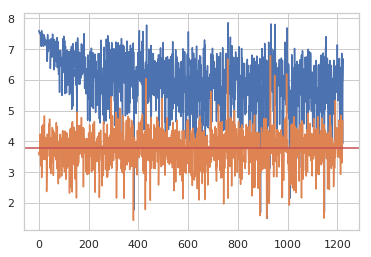

avg_bigram_loss: 3.781695766285336


In [56]:
%matplotlib inline
# NN 임베딩
plt.plot(losses)
# 통계기반 모델 loss
plt.plot(bigram_losses)
# 통계기반 모델 avg_loss
avg_bigram_loss = np.mean(bigram_losses)
plt.axhline(y=avg_bigram_loss, color='r', linestyle='-')
plt.show()

print("avg_bigram_loss:", avg_bigram_loss)